In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load dataset
df = pd.read_csv("case3_retail_kmeans_1000.csv")
df.head()

,NumPurchases,AvgBillAmount,MonthlyVisits,TotalSpending
0,44,2470,14,166713
1,58,3416,9,106754
2,41,3665,10,140194
3,51,3468,13,104544
4,56,2808,12,140180


In [3]:
# Feature
X = df[["NumPurchases","AvgBillAmount","MonthlyVisits","TotalSpending"]]

In [4]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

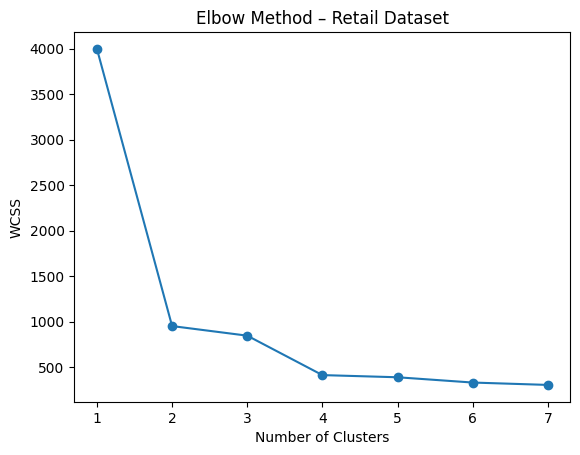

In [5]:
# Elbow Method
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method – Retail Dataset")
plt.show()


In [14]:
wcss

[3996.000000000002,
 950.3492225458738,
 844.8826446201313,
 411.5595208805012,
 387.7417069567314,
 329.69548550937037,
 303.6198147443192]

In [15]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,NumPurchases,AvgBillAmount,MonthlyVisits,TotalSpending,Cluster
0,44,2470,14,166713,2
1,58,3416,9,106754,1
2,41,3665,10,140194,1
3,51,3468,13,104544,1
4,56,2808,12,140180,2


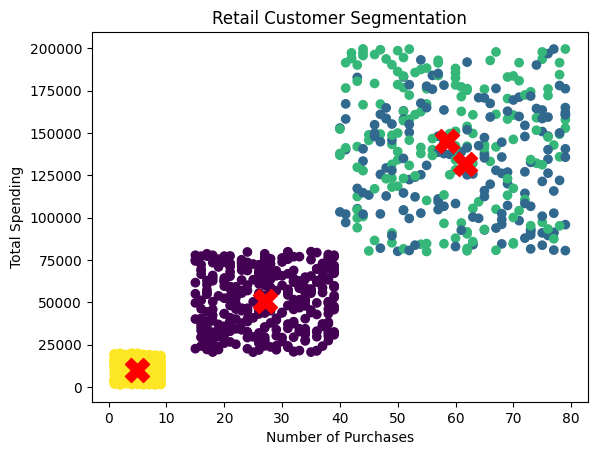

In [18]:
# Visualization
plt.scatter(
    df["NumPurchases"],
    df["TotalSpending"],
    c=df["Cluster"]
)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 3],   
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)
plt.xlabel("Number of Purchases")
plt.ylabel("Total Spending")
plt.title("Retail Customer Segmentation")
plt.show()
